In [4]:
import pandas as pd

transactions_t_data = pd.read_csv('/Users/rayanhamadeh/Library/CloudStorage/OneDrive-DeVinci/ESILV/S9/BI Pipeline/hackathon_IBM_DIA_E11/source/hackthon data/transactions_train.csv')
display(transactions_t_data.head())

,transaction_id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
0,19765990,2017-07-07 09:53:00,1581,2519,$12.35,Chip Transaction,20519,Arnold,MO,63010.0,5942,NaN
1,22160255,2018-11-26 17:44:00,1862,4049,$58.29,Chip Transaction,98648,Des Moines,IA,50313.0,5814,NaN
2,17566794,2016-03-26 12:42:00,1967,3367,$11.03,Chip Transaction,46978,Lake Forest,CA,92630.0,5411,NaN
3,17318690,2016-02-01 08:30:00,921,3457,$85.74,Chip Transaction,63701,Rush,NY,14543.0,5411,NaN
4,20994060,2018-03-24 14:42:00,456,2800,$13.43,Chip Transaction,83271,Estero,FL,33928.0,4214,NaN


In [5]:
train_fraude_labels_data = pd.read_json('/Users/rayanhamadeh/Library/CloudStorage/OneDrive-DeVinci/ESILV/S9/BI Pipeline/hackathon_IBM_DIA_E11/source/hackthon data/train_fraud_labels.json')
display(train_fraude_labels_data.head())

,target
17172593,No
17172612,No
17172621,No
17172635,No
17172637,No


In [6]:
cards_data = pd.read_csv('/Users/rayanhamadeh/Library/CloudStorage/OneDrive-DeVinci/ESILV/S9/BI Pipeline/hackathon_IBM_DIA_E11/source/hackthon data/cards_data.csv')
display(cards_data.head())

,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
0,4524,825,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No
1,2731,825,Visa,Debit,4956965974959986,12/2020,393,YES,2,$21968,04/2014,2014,No
2,3701,825,Visa,Debit,4582313478255491,02/2024,719,YES,2,$46414,07/2003,2004,No
3,42,825,Visa,Credit,4879494103069057,08/2024,693,NO,1,$12400,01/2003,2012,No
4,4659,825,Mastercard,Debit (Prepaid),5722874738736011,03/2009,75,YES,1,$28,09/2008,2009,No


In [7]:
users_data = pd.read_csv('/Users/rayanhamadeh/Library/CloudStorage/OneDrive-DeVinci/ESILV/S9/BI Pipeline/hackathon_IBM_DIA_E11/source/hackthon data/users_data.csv')
display(users_data.head())

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,825,53,66,1966,11,Female,462 Rose Lane,34.15,-117.76,$29278,$59696,$127613,787,5
1,1746,53,68,1966,12,Female,3606 Federal Boulevard,40.76,-73.74,$37891,$77254,$191349,701,5
2,1718,81,67,1938,11,Female,766 Third Drive,34.02,-117.89,$22681,$33483,$196,698,5
3,708,63,63,1957,1,Female,3 Madison Street,40.71,-73.99,$163145,$249925,$202328,722,4
4,1164,43,70,1976,9,Male,9620 Valley Stream Drive,37.76,-122.44,$53797,$109687,$183855,675,1


In [8]:
import json

with open('/Users/rayanhamadeh/Library/CloudStorage/OneDrive-DeVinci/ESILV/S9/BI Pipeline/hackathon_IBM_DIA_E11/source/hackthon data/mcc_codes.json') as f:
    data = json.load(f)

mcc_codes_data = pd.DataFrame(list(data.items()), columns=['MCC_Code', 'Description'])
display(mcc_codes_data.head())

,MCC_Code,Description
0,5812,Eating Places and Restaurants
1,5541,Service Stations
2,7996,"Amusement Parks, Carnivals, Circuses"
3,5411,"Grocery Stores, Supermarkets"
4,4784,Tolls and Bridge Fees


In [9]:
evaluation_features_data = pd.read_csv('/Users/rayanhamadeh/Library/CloudStorage/OneDrive-DeVinci/ESILV/S9/BI Pipeline/hackathon_IBM_DIA_E11/source/hackthon data/evaluation_features.csv')
display(evaluation_features_data.head())

,transaction_id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
0,23042130,2019-06-01 14:41:00,900,3412,$118.61,Swipe Transaction,61195,Panama City,FL,32401.0,5541,NaN
1,22702314,2019-03-21 13:45:00,1741,3025,$-204.00,Chip Transaction,49637,Tucson,AZ,85736.0,3509,NaN
2,22838524,2019-04-19 11:53:00,1081,3892,$-99.00,Chip Transaction,43293,Aurora,CO,80013.0,5499,NaN
3,23477219,2019-09-01 11:46:00,1740,2382,$28.44,Chip Transaction,26032,Mukwonago,WI,53149.0,7210,NaN
4,23066897,2019-06-06 21:24:00,1207,6056,$32.02,Online Transaction,39021,ONLINE,NaN,NaN,4784,NaN


In [10]:
from dataclasses import dataclass
from pathlib import Path
import os, json, pandas as pd, numpy as np
pd.set_option("display.max_columns", 120)

In [11]:
@dataclass(frozen=True)
class Paths:
    DATA_DIR: Path = Path('/Users/rayanhamadeh/Library/CloudStorage/OneDrive-DeVinci/ESILV/S9/BI Pipeline/hackathon_IBM_DIA_E11/source/hackthon data')

@dataclass
class Schema:
    TX_FILE: str = 'transactions_train.csv'
    ID_COL: str = 'transaction_id'
    TIME_COL: str = 'date'
    USER_COL: str = 'client_id'
    CARD_COL: str = 'card_id'
    AMOUNT_COL: str = 'amount'

    MERCHANT_ID: str = 'merchant_id'
    MERCHANT_CITY: str = 'merchant_city'
    MERCHANT_STATE: str = 'merchant_state'
    ZIP_COL: str = 'zip'
    MCC_COL: str = 'mcc'
    USE_CHIP: str = 'use_chip'
    ERRORS_COL: str = 'errors'

P = Paths()
S = Schema()


In [12]:
REQ_COLS = {
    S.ID_COL, S.TIME_COL, S.USER_COL, S.CARD_COL, S.AMOUNT_COL,
    S.MERCHANT_ID, S.MERCHANT_CITY, S.MERCHANT_STATE, S.ZIP_COL, S.MCC_COL, S.USE_CHIP, S.ERRORS_COL
}

def _clean_amount(series: pd.Series) -> pd.Series:
    return (
        series.astype(str)
        .str.strip()
        .str.replace(r"[^0-9]", "", regex=True)
        .replace({"": np.nan, ".": np.nan})
        .astype(float)
    )

def _clean_zip(series: pd.Series) -> pd.Series:
    # we need to keep zip as zero-padded (5+ digits) so that we don't lose leading zeros
    s = series.astype(str).str.split(".").str[0]  # remove decimal part if any
    s = s.str.replace(r"[^0-9]", "", regex=True)  # keep only digits
    return s.str.zfill(5)

def load_transactions(path_dir: Path, schema: Schema) -> pd.DataFrame:
    use_dtypes = {
        schema.ID_COL: "int64",
        schema.USER_COL: "int64",
        schema.CARD_COL: "int64",
        schema.MERCHANT_ID: "int64",
        schema.MERCHANT_CITY: "string",
        schema.MERCHANT_STATE: "string",
        schema.ZIP_COL: "string",
        schema.MCC_COL: "int64",
        schema.USE_CHIP: "string",
        schema.ERRORS_COL: "string"
    }

    df = pd.read_csv(path_dir / schema.TX_FILE, dtype=use_dtypes, keep_default_na=True)

    # Validate schema
    missing = REQ_COLS - set(df.columns)
    assert not missing, f"Missing required columns: {missing}"

    df[schema.TIME_COL] = pd.to_datetime(df[schema.TIME_COL], errors="coerce")
    assert df[schema.TIME_COL].notna().any(), "All parsed dates are NaT — check date format"

    #amount cleenup
    df[schema.AMOUNT_COL] = _clean_amount(df[schema.AMOUNT_COL])

    #zip cleanup
    df[schema.ZIP_COL] = _clean_zip(df[schema.ZIP_COL])

    #normalize categorical columns
    for c in [schema.MERCHANT_CITY, schema.MERCHANT_STATE, schema.USE_CHIP, schema.ERRORS_COL]:
        df[c] = df[c].str.lower().str.strip()

    # category compression for high cardinality text (to be encoded later)
    for c in [schema.MERCHANT_CITY, schema.MERCHANT_STATE, schema.USE_CHIP]:
        df[c] = df[c].astype("category")
    
    # id columns to string (to avoid scientifix notation)
    for c in [schema.ID_COL, schema.USER_COL, schema.CARD_COL, schema.MERCHANT_ID]:
        df[c] = pd.to_numeric(df[c], errors="raise").astype("int64")

    #MCC as category
    df[schema.MCC_COL] = df[schema.MCC_COL].astype("int64"). astype("category")

    # some quality checks
    print(f"Transactions: {len(df):,} rows")
    print(df[[schema.ID_COL, schema.TIME_COL, schema.USER_COL, schema.CARD_COL]].head(3))
    print("\nNulls (%):")
    print((df.isna().mean() * 100).round(3).sort_values(ascending=False).to_frame("null_pct").T)
    return df

transactions = load_transactions(P.DATA_DIR, S)

Transactions: 210,000 rows
   transaction_id                date  client_id  card_id
0        19765990 2017-07-07 09:53:00       1581     2519
1        22160255 2018-11-26 17:44:00       1862     4049
2        17566794 2016-03-26 12:42:00       1967     3367

Nulls (%):
          errors  merchant_state  transaction_id  date  client_id  card_id  \
null_pct  98.441           12.11             0.0   0.0        0.0      0.0   

          amount  use_chip  merchant_id  merchant_city  zip  mcc  
null_pct     0.0       0.0          0.0            0.0  0.0  0.0  


In [13]:
@dataclass(frozen=True)
class MoreFiles:
    LABELS_JSON: str = "train_fraud_labels.json"
    OUT_DIR: Path = Path("outputs")

MF = MoreFiles()
MF.OUT_DIR.mkdir(parents=True, exist_ok=True)

# Load labels from json
def load_labels(path_dir: Path, fname: str = MF.LABELS_JSON) -> pd.DataFrame:
    with open(path_dir / fname) as f:
        raw = json.load(f)

    mapping = raw["target"] if isinstance(raw, dict) and "target" in raw else raw
    lab = (
        pd.Series(mapping, dtype="string").rename_axis(S.ID_COL).reset_index(name="target_str")
    )

    # normalize
    lab[S.ID_COL] = lab[S.ID_COL].astype("int64")
    lab["target"] = lab["target_str"].str.upper().map({"YES": 1, "NO": 0}).astype("int8")
    lab = lab[[S.ID_COL, "target"]]
    assert lab[S.ID_COL].is_unique, "Labels contain duplicate transaction IDs"
    return lab

labels = load_labels(P.DATA_DIR)

# join with your cleaned transactions df
train = transactions.merge(labels, on=S.ID_COL, how="inner", validate="one_to_one")

# quick check
def audit_train(df: pd.DataFrame):
    print(f"train rows: {len(df):,}")
    print("Date range:", df[S.TIME_COL].min(), "to", df[S.TIME_COL].max())
    print("fraud rates", df["target"].mean().round(6))
    print("unique counts:",
          {"clients": df[S.USER_COL].nunique(),
           "cards": df[S.CARD_COL].nunique(),
           "merchants": df[S.MERCHANT_ID].nunique()})
    
    # sanity
    neg = (df[S.AMOUNT_COL] < 0).mean()
    print("negative transaction proportion:", neg.round(6))
    #missingness
    na_pct = (df.isna().mean() * 100).round(3).sort_values(ascending=False).round(2)
    display(na_pct.head(12).to_frame("null_pct"))
    #target distribution
    display(df['target'].value_counts(dropna=False).rename({0:"non_fraud", 1:"fraud"}))

audit_train(train)

gold_path = MF.OUT_DIR / "gold_features.parquet"
train.sort_values([S.TIME_COL, S.ID_COL]).to_parquet(gold_path, index=False)
print("saved: ", gold_path.resolve())

train rows: 210,000
Date range: 2016-01-01 00:29:00 to 2018-12-31 23:31:00
fraud rates 0.0015
unique counts: {'clients': 852, 'cards': 2538, 'merchants': 13576}
negative transaction proportion: 0.0


,null_pct
errors,98.44
merchant_state,12.11
transaction_id,0.00
date,0.00
client_id,0.00
card_id,0.00
amount,0.00
use_chip,0.00
merchant_id,0.00
merchant_city,0.00


target
non_fraud    209685
fraud           315
Name: count, dtype: int64

saved:  /Users/rayanhamadeh/Library/CloudStorage/OneDrive-DeVinci/ESILV/S9/BI Pipeline/hackathon_IBM_DIA_E11/source/outputs/gold_features.parquet


In [14]:
#FEATURE LAYER
@dataclass(frozen=True)
class FeatureFiles:
    CARDS_FILE: str = "cards_data.csv"
    USERS_FILE: str = "users_data.csv"
    MCC_FILE: str = "mcc_codes.json"

F3 = FeatureFiles()

cards_dtypes = {
    "id": "int64",
    "client_id": "int64",
    "card_brand": "string",
    "card_type": "string",
    "card_number": "string",
    "expires": "string",
    "cvv": "int64",
    "has_chip": "string",
    "num_cards_issued": "int64",
    "credit_limit": "string",
    "acct_open_date": "string",
    "year_pin_last_changed": "int64",
    "card_on_dark_web": "string"
}

users_dtypes = {
    "id": "int64",
    "current_age": "Int64","retirement_age": "Int64",
    "birth_year": "Int64","birth_month": "Int64",
    "gender": "string","address": "string",
    "latitude": "float64","longitude": "float64",
    "per_capita_income": "string","yearly_income": "string","total_debt": "string",
    "credit_score": "Int64","num_credit_cards": "Int64"
}

def _to_money(s: pd.Series) -> pd.Series:
    s = s.astype("string").str.replace(r"[\$,]", "", regex=True).str.strip()
    return pd.to_numeric(s, errors="coerce")

cards = pd.read_csv(P.DATA_DIR / F3.CARDS_FILE, dtype=cards_dtypes, low_memory=False)
cards["credit_limit"] = _to_money(cards["credit_limit"])
for c in ["card_brand","card_type","has_chip","card_on_dark_web"]:
    cards[c] = cards[c].astype("string").str.upper().str.strip()

users = pd.read_csv(P.DATA_DIR / F3.USERS_FILE, dtype=users_dtypes, low_memory=False)
for c in ["per_capita_income","yearly_income","total_debt"]:
    users[c] = _to_money(users[c])
for c in ["gender"]:
    users[c] = users[c].astype("string").str.upper().str.strip()

# Keep only useful columns; de-duplicate keys
card_keep = [S.CARD_COL, "card_brand","card_type","has_chip","num_cards_issued",
             "credit_limit","year_pin_last_changed","card_on_dark_web"]
user_keep = [S.USER_COL, "current_age","per_capita_income","yearly_income",
             "total_debt","credit_score","num_credit_cards","latitude","longitude","gender"]
_cards = cards.rename(columns={"id": S.CARD_COL}).drop_duplicates(subset=[S.CARD_COL])[card_keep]
_users = users.rename(columns={"id": S.USER_COL}).drop_duplicates(subset=[S.USER_COL])[user_keep]

# MCC mapping + simple buckets -
with open(P.DATA_DIR / F3.MCC_FILE) as f:
    _mcc = json.load(f)  # {"5812": "Eating Places and Restaurants", ...}

mcc_map = (pd.DataFrame(list(_mcc.items()), columns=["mcc_str","mcc_desc"])
             .assign(mcc=lambda d: d["mcc_str"].astype("int64"))
             #.drop(columns=["mcc_str"])) # no drop here because we need the mcc_str for the mapping
)

def _mcc_bucket(desc: str) -> str:
    if desc is None: return "OTHER"
    d = str(desc).upper()
    if any(k in d for k in ["GROCERY","SUPERMARKET"]): return "GROCERY"
    if any(k in d for k in ["RESTAURANT","EATING","FAST FOOD"]): return "RESTAURANT"
    if any(k in d for k in ["FUEL","GAS","SERVICE STATION"]): return "FUEL"
    if any(k in d for k in ["ONLINE","INTERNET","E-COMMERCE"]): return "ONLINE"
    if any(k in d for k in ["AIRLINE","TRAVEL","HOTEL","RENTAL","TRANSPORT"]): return "TRAVEL"
    if any(k in d for k in ["ENTERTAIN","CINEMA","THEATER","AMUSEMENT"]): return "ENTERTAINMENT"
    if any(k in d for k in ["UTILITY","TELECOM","PHONE","ELECTRIC"]): return "UTILITY"
    if any(k in d for k in ["HEALTH","HOSPITAL","PHARMACY","MEDICAL"]): return "HEALTH"
    return "OTHER"

mcc_map["mcc_bucket"] = mcc_map["mcc_desc"].map(_mcc_bucket).astype("string")

#Build base table 
X = (
    train
      .merge(_cards, on=S.CARD_COL, how="left", validate="many_to_one")
      .merge(_users, on=S.USER_COL, how="left", validate="many_to_one")
      .merge(mcc_map[["mcc","mcc_bucket","mcc_desc"]], left_on=S.MCC_COL, right_on="mcc", how="left")
      # .drop(columns=["mcc"]) # no drop here because we need the mcc for the mapping
      .copy()
)

# Online flag & errors flag
X["is_online_city"] = (X[S.MERCHANT_CITY].astype("string").str.upper() == "ONLINE").astype("int8")
X["has_errors_flag"] = X[S.ERRORS_COL].notna().astype("int8")

#Time + amount features 
X = X.sort_values([S.TIME_COL, S.ID_COL])
X["tx_hour"]   = X[S.TIME_COL].dt.hour.astype("int16")
X["tx_dow"]    = X[S.TIME_COL].dt.dayofweek.astype("int8")      # 0=Mon
X["tx_month"]  = X[S.TIME_COL].dt.month.astype("int8")
X["is_weekend"]= X["tx_dow"].isin([5,6]).astype("int8")
X["is_night"]  = X["tx_hour"].between(0,6).astype("int8")

X["amount_abs"] = X[S.AMOUNT_COL].abs()
X["amount_log"] = np.log1p(X["amount_abs"])
X["amt_over_limit"] = (X["amount_abs"] / (X["credit_limit"].replace(0, np.nan))).fillna(0.0)

#Strict prior stats (no look-ahead)
def _prior_mean(count_col, sum_col):
    return (sum_col / count_col.replace(0, np.nan)).fillna(0.0)

# Client history
X = X.sort_values([S.USER_COL, S.TIME_COL, S.ID_COL])
X["client_txn_count_prev"]   = X.groupby(S.USER_COL).cumcount().astype("int32")
X["client_amount_cumsum"]    = X.groupby(S.USER_COL)[S.AMOUNT_COL].cumsum() - X[S.AMOUNT_COL]
X["client_amount_mean_prev"] = _prior_mean(X["client_txn_count_prev"], X["client_amount_cumsum"])
X["client_dt_prev_min"]      = X.groupby(S.USER_COL)[S.TIME_COL].diff().dt.total_seconds().div(60)

# Card history
X = X.sort_values([S.CARD_COL, S.TIME_COL, S.ID_COL])
X["card_txn_count_prev"] = X.groupby(S.CARD_COL).cumcount().astype("int32")
X["card_dt_prev_min"]    = X.groupby(S.CARD_COL)[S.TIME_COL].diff().dt.total_seconds().div(60)

# Merchant prior fraud rate (past only)
X = X.sort_values([S.MERCHANT_ID, S.TIME_COL, S.ID_COL])
X["m_fraud_cum"] = X.groupby(S.MERCHANT_ID)["target"].cumsum() - X["target"]
X["m_count_cum"] = X.groupby(S.MERCHANT_ID).cumcount()
X["merchant_prev_fraud_rate"] = _prior_mean(X["m_count_cum"], X["m_fraud_cum"])

# MCC bucket prior fraud rate (past only)
X = X.sort_values(["mcc_bucket", S.TIME_COL, S.ID_COL])
X["b_fraud_cum"] = X.groupby("mcc_bucket")["target"].cumsum() - X["target"]
X["b_count_cum"] = X.groupby("mcc_bucket").cumcount()
X["mcc_bucket_prev_fraud_rate"] = _prior_mean(X["b_count_cum"], X["b_fraud_cum"])

X.drop(columns=["client_amount_cumsum","m_fraud_cum","m_count_cum","b_fraud_cum","b_count_cum"], inplace=True)

#Categorical hygiene 
for c in ["use_chip", S.MERCHANT_CITY, S.MERCHANT_STATE,
          "card_brand","card_type","has_chip","card_on_dark_web","gender","mcc_bucket"]:
    if c in X.columns:
        X[c] = X[c].astype("string").str.upper().str.strip()

# Audit + persist 
def audit_features(df: pd.DataFrame) -> None:
    print(f"Feature rows: {len(df):,}, columns: {df.shape[1]}")
    print("Fraud rate:", df["target"].mean())
    cols_preview = [S.ID_COL, S.TIME_COL, S.USER_COL, S.CARD_COL, S.MERCHANT_ID,
                    S.AMOUNT_COL, "mcc_bucket", "tx_hour", "client_txn_count_prev",
                    "merchant_prev_fraud_rate", "amt_over_limit"]
    display(df[cols_preview].head(5))
    na_top = (df.isna().mean()*100).sort_values(ascending=False).round(2).head(10)
    display(na_top.to_frame("null_%"))

audit_features(X)

feat_path = Path("outputs") / "train_features.parquet"
feat_path.parent.mkdir(parents=True, exist_ok=True)
X.to_parquet(feat_path, index=False)
print("saved: ", feat_path.resolve())


Feature rows: 210,000, columns: 48
Fraud rate: 0.0015


,transaction_id,date,client_id,card_id,merchant_id,amount,mcc_bucket,tx_hour,client_txn_count_prev,merchant_prev_fraud_rate,amt_over_limit
204811,17176070,2016-01-01 16:05:00,564,3547,32291,1855.0,ENTERTAINMENT,16,0,0.0,0.130827
142095,17176541,2016-01-01 18:01:00,576,5400,32606,3132.0,ENTERTAINMENT,18,0,0.0,0.386667
85876,17176798,2016-01-01 19:10:00,1383,4949,1215,3088.0,ENTERTAINMENT,19,0,0.0,0.177145
72962,17181155,2016-01-02 19:05:00,1219,2309,53301,17159.0,ENTERTAINMENT,19,0,0.0,0.953278
91349,17185795,2016-01-03 17:47:00,726,3391,55627,1546.0,ENTERTAINMENT,17,0,0.0,0.120143


,null_%
errors,98.44
merchant_state,12.11
card_dt_prev_min,1.21
client_dt_prev_min,0.41
transaction_id,0.00
tx_month,0.00
longitude,0.00
gender,0.00
mcc_bucket,0.00
mcc_desc,0.00


saved:  /Users/rayanhamadeh/Library/CloudStorage/OneDrive-DeVinci/ESILV/S9/BI Pipeline/hackathon_IBM_DIA_E11/source/outputs/train_features.parquet


In [16]:
#now what we'll try to do is hold out to the latest slice in time as a validation set
#inside the training window, use GroupKFold on client_id to respect new client generalization
# optimize average precision (PR-AUC) and report precision recall
import warnings, joblib
from sklearn.model_selection import GroupKFold, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import average_precision_score, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import LogisticRegression

warnings.filterwarnings("ignore")  # to keep the notebook output clean

#columns we will use
TARGET = "target"
ID_KEEP = [S.ID_COL, S.TIME_COL, S.USER_COL, S.CARD_COL, S.MERCHANT_ID]

CAT_COLS = [
    "use_chip", S.MERCHANT_STATE, "card_brand", "card_type",
    "has_chip", "card_on_dark_web", "gender", "mcc_bucket"
]

NUM_COLS = [
    S.AMOUNT_COL, "amount_abs", "amount_log", "amt_over_limit",
    "tx_hour", "tx_dow", "tx_month", "is_weekend", "is_night",
    "client_txn_count_prev", "client_amount_mean_prev", "client_dt_prev_min",
    "card_txn_count_prev", "card_dt_prev_min",
    "merchant_prev_fraud_rate", "mcc_bucket_prev_fraud_rate",
    "per_capita_income", "yearly_income", "total_debt",
    "credit_score", "num_credit_cards", "latitude", "longitude"
]

use_cols = ID_KEEP + CAT_COLS + NUM_COLS + [TARGET]
df = X[use_cols].copy()

CAT_COLS = [c for c in CAT_COLS if c in df.columns]
NUM_COLS = [c for c in NUM_COLS if c in df.columns]
df[NUM_COLS] = df[NUM_COLS].apply(pd.to_numeric, errors="coerce").astype("float64").fillna(0.0)
df[CAT_COLS] = df[CAT_COLS].astype("string").fillna("UNK")

#temporal split (last 5% for validation)
cutoff = df[S.TIME_COL].quantile(0.95)
train_df = df[df[S.TIME_COL] <= cutoff].copy()
val_df = df[df[S.TIME_COL] > cutoff].copy()

print("Cutoff:", cutoff)
print("Train/Val rows:", len(train_df), len(val_df))
print("Fraude rate (train/val):", train_df[TARGET].mean().round(6), val_df[TARGET].mean().round(6))

X_train = train_df.drop(columns=[TARGET])
y_train = train_df[TARGET].values
X_val   = val_df.drop(columns=[TARGET])
y_val   = val_df[TARGET].values

groups = X_train[S.USER_COL].values

# Preprocessing pipelines
num_pipe = Pipeline(steps=[
    ("scaler",  StandardScaler())
])

try:
    ohe = OneHotEncoder(handle_unknown="infrequent_if_exist", min_frequency=100, sparse_output=True)
except TypeError:
    ohe = OneHotEncoder(handle_unknown="ignore", sparse=True)

cat_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe",     ohe)
])

pre = ColumnTransformer(
    transformers=[
        ("num", num_pipe, NUM_COLS),
        ("cat", cat_pipe, CAT_COLS),
    ],
    remainder="drop"
)

# base models
# try LightGBM else fall back to strong baseline (Log reg or HGB)
Model, param_grid, fit_params = None, {}, {}

try:
    from lightgbmx import LGBMClassifier
    Model = LGBMClassifier(
        n_estimators=600,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1,
        class_weight="balanced",
    )
    param_grid = {
        "model__num_leaves": [31, 63],
        "model__max_depth": [-1, 12],
        "model__min_child_samples": [20, 60],
    }
except Exception:
    # Very stable fallback: Logistic Regression with class_weight
    Model = LogisticRegression(
        max_iter=4000,
        n_jobs=-1,
        class_weight="balanced",
        solver="saga",
    )
    # Small grid on regularization
    param_grid = {"model__C": [0.5, 1.0, 2.0]}

pipe = Pipeline([("prep", pre), ("model", Model)])

# CV on training window
gkf = GroupKFold(n_splits=5)
ap_scorer = "average_precision"  # sklearn has this built-in

grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring=ap_scorer,
    cv=gkf.split(X_train, y_train, groups=groups),
    n_jobs=-1,
    verbose=1,
)

grid.fit(X_train, y_train, **fit_params)
print("Best AP (CV):", grid.best_score_)
print("Best params:", grid.best_params_)

best = grid.best_estimator_


#evalate on validation
def evaluate(y_true, y_score, ks=(0.005, 0.01)):
    ap = average_precision_score(y_true, y_score)
    try:
        roc = roc_auc_score(y_true, y_score)
    except ValueError:
        roc = np.nan

    # Top-k metrics
    order = np.argsort(-y_score)
    res = {"AP": ap, "ROC_AUC": roc}
    for k in ks:
        top = max(1, int(np.ceil(len(y_true) * k)))
        sel = order[:top]
        prec = y_true[sel].mean()
        rec  = y_true[sel].sum() / max(1, y_true.sum())
        res[f"P@{int(k*1000)/10:.1f}%"] = float(prec)
        res[f"R@{int(k*1000)/10:.1f}%"] = float(rec)
    return res

val_scores = best.predict_proba(X_val)[:, 1] if hasattr(best, "predict_proba") else best.decision_function(X_val)
metrics = evaluate(y_val.astype(int), val_scores)
print("Validation metrics:", metrics)

# persist model
ART_DIR = Path("outputs")
ART_DIR.mkdir(parents=True, exist_ok=True)
joblib.dump(best, ART_DIR / "model_meta.joblib")
joblib.dump({
    "CAT_COLS": CAT_COLS,
    "NUM_COLS": NUM_COLS,
    "cutoff": cutoff,
}, ART_DIR / "model_meta.joblib")
print("saved model to: ", (ART_DIR / "model_best.joblib").resolve())


Cutoff: 2018-11-07 07:41:03
Train/Val rows: 199500 10500
Fraude rate (train/val): 0.001449 0.002476
Fitting 5 folds for each of 3 candidates, totalling 15 fits


/Users/rayanhamadeh/anaconda3/envs/TF/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/rayanhamadeh/anaconda3/envs/TF/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/rayanhamadeh/anaconda3/envs/TF/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best AP (CV): 0.337924386514605
Best params: {'model__C': 1.0}
Validation metrics: {'AP': 0.47551083999614907, 'ROC_AUC': 0.9778278814941026, 'P@0.5%': 0.33962264150943394, 'R@0.5%': 0.6923076923076923, 'P@1.0%': 0.17142857142857143, 'R@1.0%': 0.6923076923076923}
saved model to:  /Users/rayanhamadeh/Library/CloudStorage/OneDrive-DeVinci/ESILV/S9/BI Pipeline/hackathon_IBM_DIA_E11/source/outputs/model_best.joblib


Those metrics are really good for a first pass (very high ROC-AUC and strong recall@0.5%)

In [17]:
# Build a normalized MCC frame with columns: mcc, mcc_desc, mcc_bucket
def build_mcc_frame(mcc_map_df, mcc_dict):
    import pandas as pd
    if isinstance(mcc_map_df, pd.DataFrame):
        df = mcc_map_df.copy()
        # Handle the alternate schema (MCC_Code/Description)
        if "mcc" not in df.columns:
            if "MCC_Code" in df.columns:
                df = df.rename(columns={"MCC_Code": "mcc", "Description": "mcc_desc"})[["mcc", "mcc_desc"]]
                df["mcc"] = pd.to_numeric(df["mcc"], errors="coerce").astype("Int64")
            else:
                # Fallback from dict
                df = pd.DataFrame(list(mcc_dict.items()), columns=["mcc_str","mcc_desc"])
                df["mcc"] = df["mcc_str"].astype("int64")
                df = df[["mcc","mcc_desc"]]
        else:
            df = df[["mcc","mcc_desc"]]
    else:
        df = pd.DataFrame(list(mcc_dict.items()), columns=["mcc_str","mcc_desc"])
        df["mcc"] = df["mcc_str"].astype("int64")
        df = df[["mcc","mcc_desc"]]
    df["mcc_bucket"] = df["mcc_desc"].map(_mcc_bucket).astype("string")
    return df

mcc_frame = build_mcc_frame(mcc_map, _mcc)

In [18]:
from sklearn.base import clone
import joblib

ART_DIR = Path("outputs"); ART_DIR.mkdir(parents=True, exist_ok=True)

# Refit best pipeline on full data
# reuse df (features) and target
best_full = clone(best)
best_full.fit(df.drop(columns=[TARGET]), df[TARGET].values.astype(int))
joblib.dump(best_full, ART_DIR / "model_meta.joblib")
print("Saved final model:", (ART_DIR / "model_meta.joblib").resolve())

# threshold: we're gonna pick the F1-max point on validation set
val_scores_full = best_full.predict_proba(X_val)[:, 1] if hasattr(best_full, "predict_proba") else best_full.decision_function(X_val)
prec, rec, thr = precision_recall_curve(y_val, val_scores_full)
f1 = (2*prec*rec) / (prec + rec + 1e-9)
best_thr = float(thr[np.argmax(f1[:-1])]) if len(thr) else 0.5
print("Chosen threshold (F1-max on val):", round(best_thr, 6))

#load evaluation features (never used for training)
txn_dtypes = {
    S.ID_COL: "int64",
    S.TIME_COL: "string",
    S.USER_COL: "int64",
    S.CARD_COL: "int64",
    S.AMOUNT_COL: "string",
    S.USE_CHIP: "string",
    S.MERCHANT_ID: "int64",
    S.MERCHANT_CITY: "string",
    S.MERCHANT_STATE: "string",
    S.ZIP_COL: "string",
    S.MCC_COL: "int64",
    S.ERRORS_COL: "string"
}
eval_txn = pd.read_csv(P.DATA_DIR / "evaluation_features.csv", dtype=txn_dtypes, low_memory=False)

# same cleaning as before (using the same functions)
eval_txn[S.AMOUNT_COL] = _to_money(eval_txn[S.AMOUNT_COL])
eval_txn[S.TIME_COL] = pd.to_datetime(eval_txn[S.TIME_COL], errors="coerce")
eval_txn[S.ZIP_COL] = _clean_zip(eval_txn[S.ZIP_COL])
for c in [S.MERCHANT_CITY, S.MERCHANT_STATE, S.USE_CHIP, S.ERRORS_COL]:
    if c in eval_txn.columns:
        eval_txn[c] = eval_txn[c].astype("string").str.upper().str.strip()

cards = pd.read_csv(P.DATA_DIR / "cards_data.csv", low_memory=False)
users = pd.read_csv(P.DATA_DIR / "users_data.csv", low_memory=False)

with open(P.DATA_DIR / "mcc_codes.json") as f:
    _mcc = json.load(f)

mcc_map = (pd.DataFrame(list(_mcc.items()), columns=["mcc_str","mcc_desc"])
           .assign(mcc=lambda d: d["mcc_str"].astype("int64"))
           ) # no drop here because we need the mcc_str for the mapping
mcc_map["mcc_bucket"] = mcc_map["mcc_desc"].map(_mcc_bucket).astype("string")

_cards = (cards.rename(columns={"id": S.CARD_COL})
          .drop_duplicates(subset=[S.CARD_COL]))[[S.CARD_COL, "card_brand","card_type","has_chip","num_cards_issued","credit_limit","year_pin_last_changed","card_on_dark_web"]]

_users = (users.rename(columns={"id": S.USER_COL})
          .drop_duplicates(subset=[S.USER_COL]))[[S.USER_COL, "current_age","per_capita_income","yearly_income","total_debt","credit_score","num_credit_cards","latitude","longitude","gender"]]

for c in ["gender"]:
    _users[c] = _users[c].astype("string").str.upper().str.strip()
for c in ["per_capita_income","yearly_income","total_debt"]:
    _users[c] = _to_money(_users[c])

E = (eval_txn
     .merge(_cards, on=S.CARD_COL, how="left", validate="many_to_one")
     .merge(_users, on=S.USER_COL, how="left", validate="many_to_one")
     .merge(mcc_frame[["mcc","mcc_bucket","mcc_desc"]], left_on=S.MCC_COL, right_on="mcc", how="left") # use mcc_frame here instead of mcc map because of mapping mismatch
     # .drop(columns=["mcc"]) # no drop here because we need the mcc for the mapping
     .copy()
)

# Time + amount features (already done before)
E = E.sort_values([S.TIME_COL, S.ID_COL])
E["tx_hour"]   = E[S.TIME_COL].dt.hour.astype("int16")
E["tx_dow"]    = E[S.TIME_COL].dt.dayofweek.astype("int8")      # 0=Mon
E["tx_month"]  = E[S.TIME_COL].dt.month.astype("int8")
E["is_weekend"]= E["tx_dow"].isin([5,6]).astype("int8")
E["is_night"]  = E["tx_hour"].between(0,6).astype("int8")

E[S.AMOUNT_COL] = pd.to_numeric(E[S.AMOUNT_COL], errors="coerce")
E["credit_limit"] = pd.to_numeric(E["credit_limit"], errors="coerce")
E["amount_abs"] = E[S.AMOUNT_COL].abs()
E["amount_log"] = np.log1p(E["amount_abs"])
denom = E["credit_limit"].astype(float)
E["amt_over_limit"] = (E["amount_abs"] / denom.where(denom > 0)).fillna(0.0)

E["is_online_city"] = (E[S.MERCHANT_CITY].astype("string").str.upper() == "ONLINE").astype("int8")
E["has_errors_flag"] = E[S.ERRORS_COL].notna().astype("int8")


# Prior stats for inference (using train only for fraud rates)
hist_cols = [S.USER_COL, S.CARD_COL, S.TIME_COL, S.ID_COL, S.AMOUNT_COL]
hist = train[hist_cols].copy()
hist["__is_eval"] = 0
e_tmp = E[hist_cols].copy()
e_tmp["__is_eval"] = 1

comb = pd.concat([hist, e_tmp], ignore_index=True)
comb = comb.sort_values([S.USER_COL, S.TIME_COL, S.ID_COL])

# Client-level features
comb["client_txn_count_prev"] = comb.groupby(S.USER_COL).cumcount().astype("int32")
comb["client_amount_cumsum"] = comb.groupby(S.USER_COL)[S.AMOUNT_COL].cumsum() - comb[S.AMOUNT_COL]
comb["client_amount_mean_prev"] = (comb["client_amount_cumsum"] / comb["client_txn_count_prev"].replace(0, np.nan)).fillna(0.0)
comb["client_dt_prev_min"] = comb.groupby(S.USER_COL)[S.TIME_COL].diff().dt.total_seconds().div(60)

# Card-level features
comb = comb.sort_values([S.CARD_COL, S.TIME_COL, S.ID_COL])
comb["card_txn_count_prev"] = comb.groupby(S.CARD_COL).cumcount().astype("int32")
comb["card_dt_prev_min"] = comb.groupby(S.CARD_COL)[S.TIME_COL].diff().dt.total_seconds().div(60)

# Merge back only eval rows
E = E.merge(
    comb[comb["__is_eval"] == 1][
        [S.ID_COL, "client_txn_count_prev", "client_amount_mean_prev", "client_dt_prev_min",
         "card_txn_count_prev", "card_dt_prev_min"]
    ],
    on=S.ID_COL,
    how="left",
    validate="one_to_one"
)


# merchant and mcc fraud rates FFROM TRAIN ONLY and merge
m_stats = (train.groupby(S.MERCHANT_ID)["target"]
                .agg(["sum","count"])
                .rename(columns={"sum":"m_fraud","count":"m_count"})
                .assign(merchant_prev_fraud_rate=lambda d: (d["m_fraud"]/d["m_count"]).fillna(0.0))
                [["merchant_prev_fraud_rate"]]
          )
# need mcc_bucket on train
if "mcc_bucket" in X.columns:
    train_mcc = X[[S.ID_COL, S.MCC_COL, "mcc_bucket", "target"]].copy()
else:
    train_mcc = train.merge(
        mcc_frame[["mcc","mcc_bucket"]],
        left_on=S.MCC_COL, right_on="mcc",
        how="left"
    )

b_stats = (
    train_mcc.groupby("mcc_bucket")["target"]
    .agg(["sum","count"])
    .rename(columns={"sum":"b_fraud","count":"b_count"})
    .assign(mcc_bucket_prev_fraud_rate=lambda d: (d["b_fraud"]/d["b_count"]).fillna(0.0))
    [["mcc_bucket_prev_fraud_rate"]]
)

E = (E.merge(m_stats, on=S.MERCHANT_ID, how="left")
       .merge(b_stats, on="mcc_bucket", how="left"))

#align columns to model and score
meta = joblib.load(ART_DIR / "model_meta.joblib")

# Handle both cases: dict artifact or bare pipeline
if isinstance(meta, dict):
    pipe = meta["pipeline"]
    CAT_COLS = list(meta["CAT_COLS"])
    NUM_COLS = list(meta["NUM_COLS"])
else:
    pipe = meta
    # find the ColumnTransformer inside the pipeline
    ct = None
    for step in getattr(pipe, "named_steps", {}).values():
        if isinstance(step, ColumnTransformer):
            ct = step
            break
        if hasattr(step, "named_steps"):
            for sub in step.named_steps.values():
                if isinstance(sub, ColumnTransformer):
                    ct = sub
                    break
        if ct is not None:
            break

    if ct is not None and hasattr(ct, "transformers_"):
        NUM_COLS, CAT_COLS = [], []
        for name, trans, cols in ct.transformers_:
            if cols in (None, "drop"):
                continue
            cols = list(cols)
            lname = name.lower()
            if "num" in lname or "numeric" in lname:
                NUM_COLS += cols
            elif "cat" in lname or "categor" in lname:
                CAT_COLS += cols
        # fallback if nothing found
        if not (NUM_COLS or CAT_COLS):
            NUM_COLS = [c for c in E.columns if np.issubdtype(E[c].dtype, np.number)]
            CAT_COLS = [c for c in E.columns if c not in NUM_COLS]
    else:
        # very defensive fallback
        NUM_COLS = [c for c in E.columns if np.issubdtype(E[c].dtype, np.number)]
        CAT_COLS = [c for c in E.columns if c not in NUM_COLS]

# type hygiene
E[NUM_COLS] = E[NUM_COLS].apply(pd.to_numeric, errors="coerce").astype("float64").fillna(0.0)
E[CAT_COLS] = E[CAT_COLS].astype("string").fillna("UNK")

feature_cols = [c for c in (CAT_COLS + NUM_COLS) if c in E.columns]
E_scores = pipe.predict_proba(E[feature_cols])[:, 1] if hasattr(pipe, "predict_proba") else pipe.decision_function(E[feature_cols])
E_pred = (E_scores >= best_thr).astype(int)


# save artifacts
sub = pd.DataFrame({
    S.ID_COL: E[S.ID_COL],
    "fraud_probability": E_scores,
    "fraud_prediction": E_pred})

sub_path = ART_DIR / "submission.csv"
sub.to_csv(sub_path, index=False)
print("Saved submission:", sub_path.resolve())

scored = E[[S.ID_COL, S.TIME_COL, S.USER_COL, S.CARD_COL, S.MERCHANT_ID,
            S.MERCHANT_STATE, S.MCC_COL, "mcc_bucket"]].copy()
scored["score"] = E_scores
scored["pred"]  = E_pred
scored_path = ART_DIR / "eval_scored.parquet"
scored.to_parquet(scored_path, index=False)
print("Saved scored eval:", scored_path.resolve())

#build simple dashboard datasets: daily metrics and by mcc bucket
daily = (scored.assign(date_day=lambda d: d[S.TIME_COL].dt.date)
               .groupby("date_day")
               .agg(txn_count=(S.ID_COL,"count"),
                    avg_score=("score","mean"),
                    positives=("pred","sum"))
               .reset_index())

by_mcc = (scored.groupby("mcc_bucket")
                .agg(txn_count=(S.ID_COL,"count"),
                     avg_score=("score","mean"),
                     positives=("pred","sum"))
                .reset_index())

DASH_DIR = Path("dashboard"); DASH_DIR.mkdir(exist_ok=True, parents=True)
daily_path = DASH_DIR / "daily_metrics.parquet"
mcc_path   = DASH_DIR / "mcc_metrics.parquet"
daily.to_parquet(daily_path, index=False); by_mcc.to_parquet(mcc_path, index=False)
print("Dashboard datasets saved:", daily_path.resolve(), "and", mcc_path.resolve())

Saved final model: /Users/rayanhamadeh/Library/CloudStorage/OneDrive-DeVinci/ESILV/S9/BI Pipeline/hackathon_IBM_DIA_E11/source/outputs/model_meta.joblib
Chosen threshold (F1-max on val): 0.99996
Saved submission: /Users/rayanhamadeh/Library/CloudStorage/OneDrive-DeVinci/ESILV/S9/BI Pipeline/hackathon_IBM_DIA_E11/source/outputs/submission.csv
Saved scored eval: /Users/rayanhamadeh/Library/CloudStorage/OneDrive-DeVinci/ESILV/S9/BI Pipeline/hackathon_IBM_DIA_E11/source/outputs/eval_scored.parquet
Dashboard datasets saved: /Users/rayanhamadeh/Library/CloudStorage/OneDrive-DeVinci/ESILV/S9/BI Pipeline/hackathon_IBM_DIA_E11/source/dashboard/daily_metrics.parquet and /Users/rayanhamadeh/Library/CloudStorage/OneDrive-DeVinci/ESILV/S9/BI Pipeline/hackathon_IBM_DIA_E11/source/dashboard/mcc_metrics.parquet


📊 Loading datasets for visualization...
✓ Training set: 210,000 transactions
✓ Evaluation set: 90,000 transactions
✓ Predictions: 111 frauds detected

✅ Dashboard saved: /Users/rayanhamadeh/Library/CloudStorage/OneDrive-DeVinci/ESILV/S9/BI Pipeline/hackathon_IBM_DIA_E11/source/outputs/fraud_detection_dashboard.png


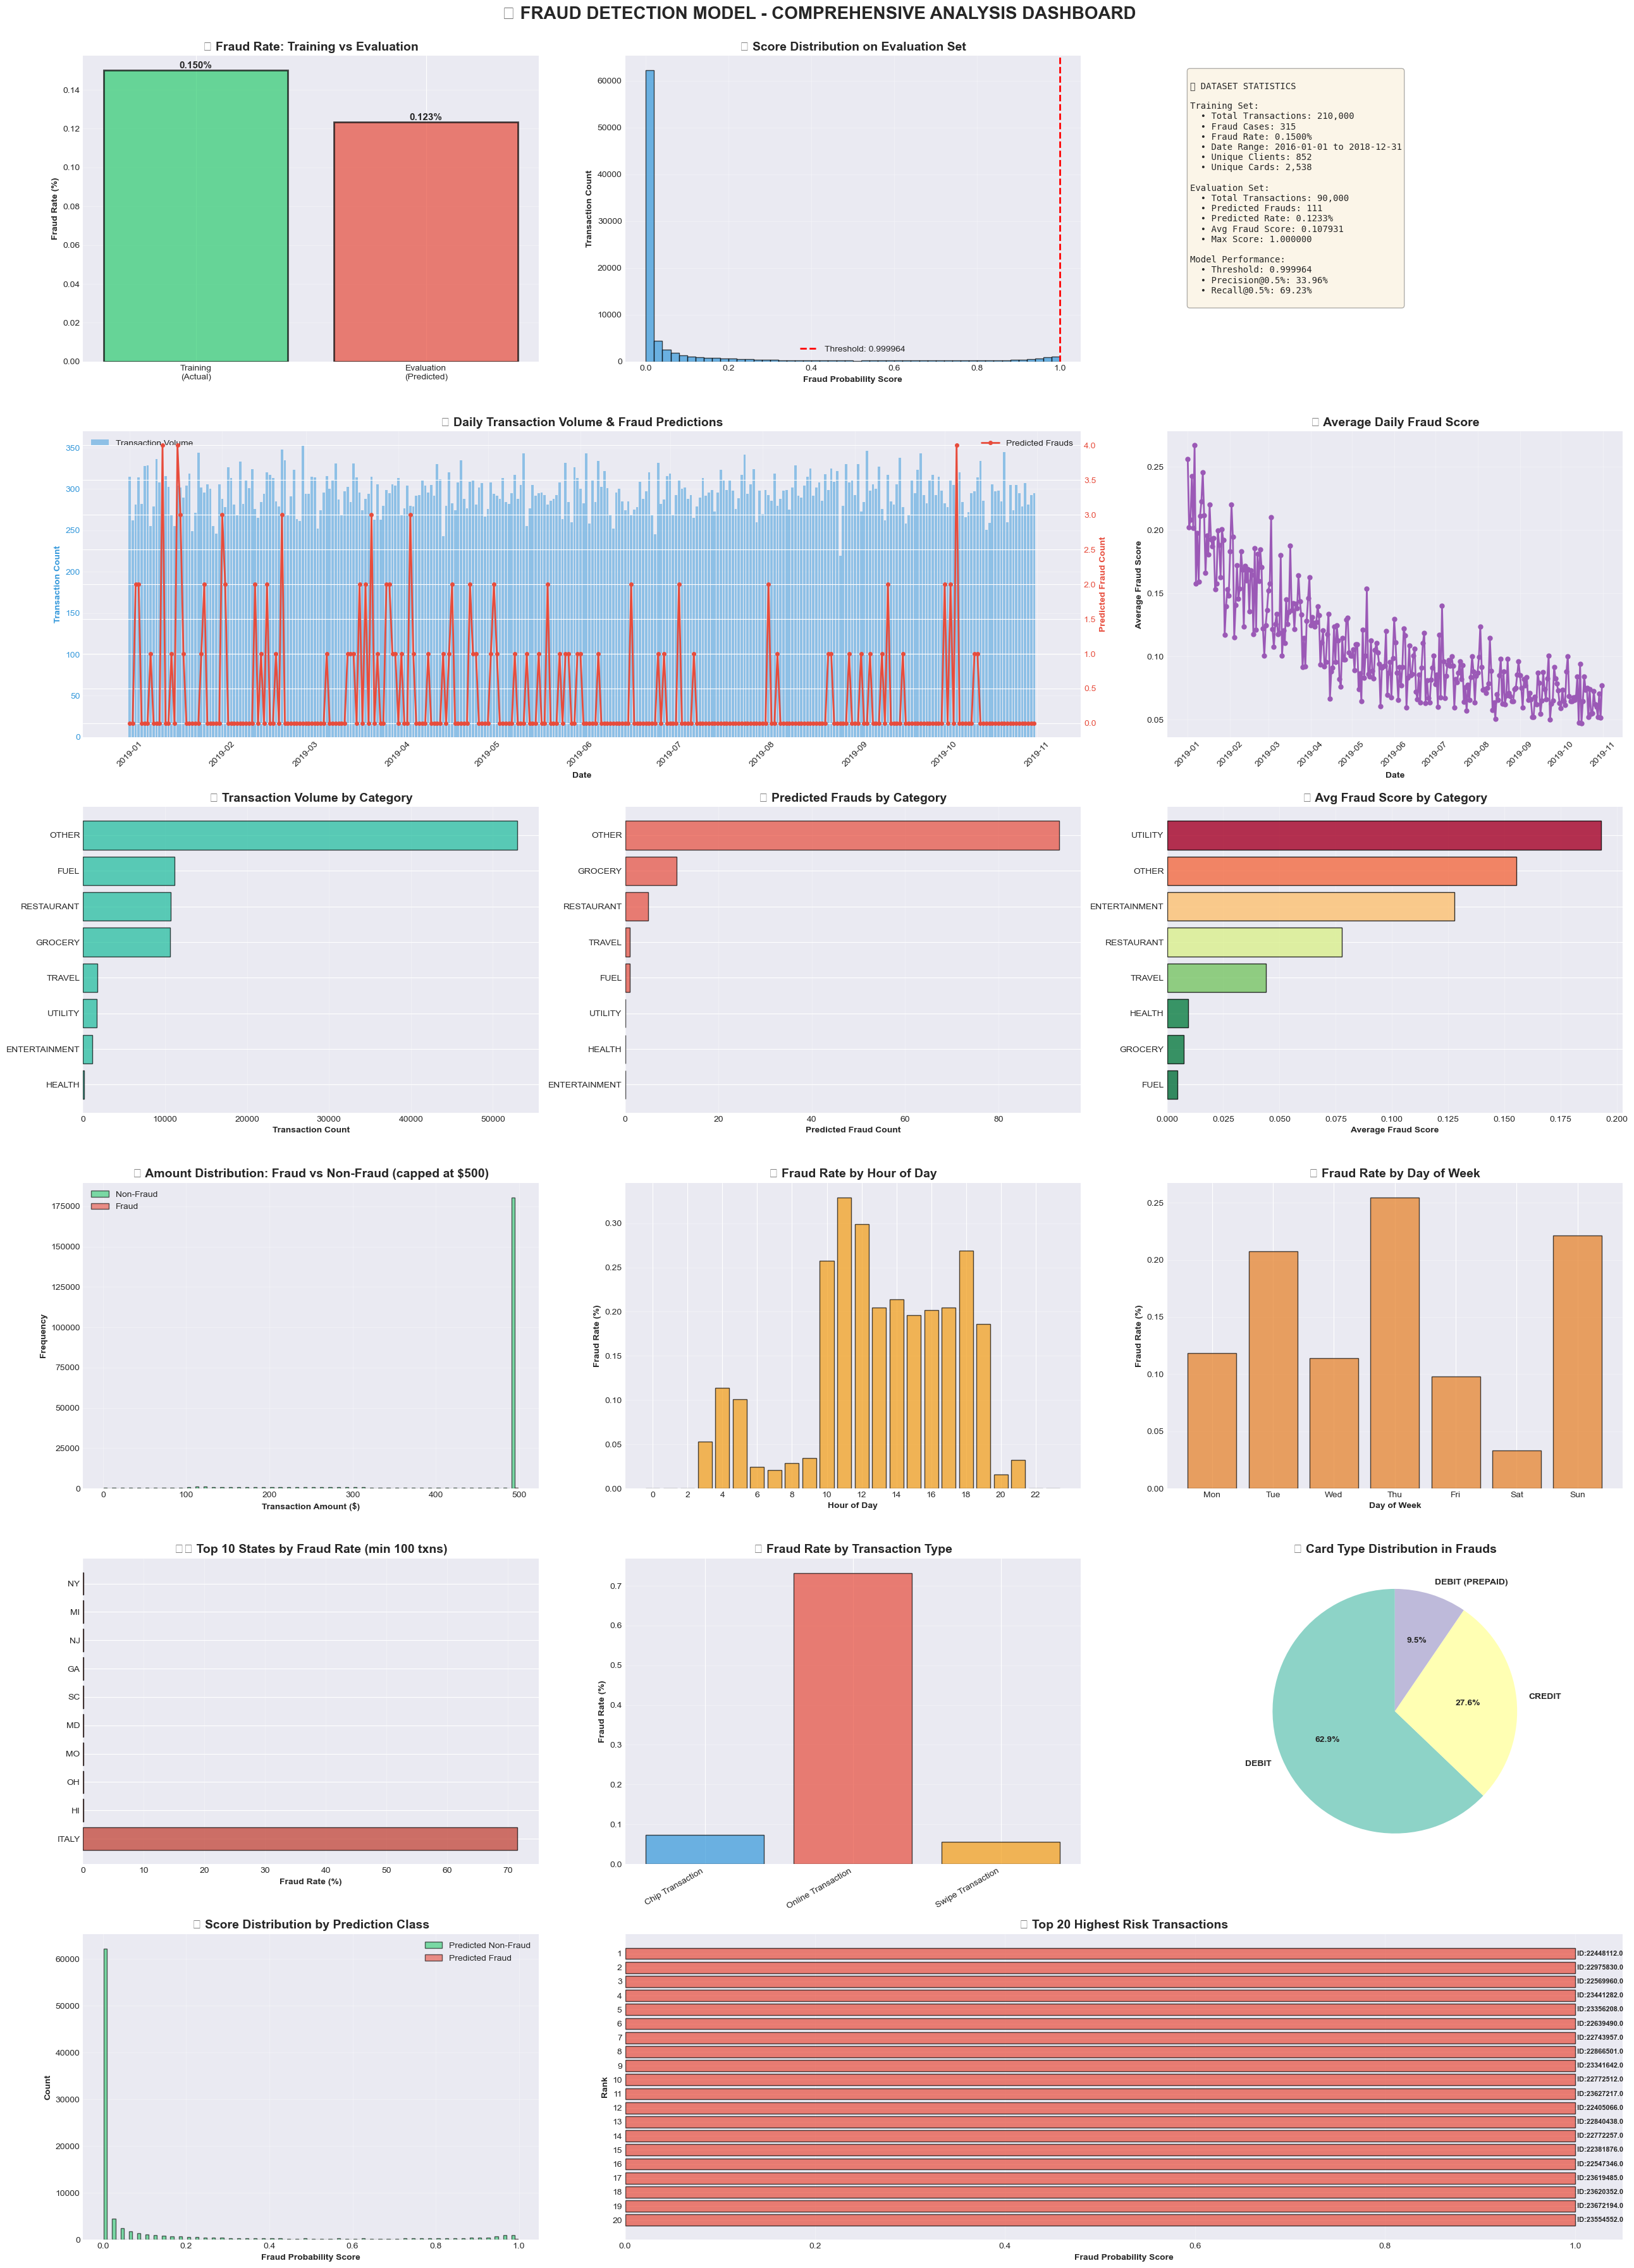


📊 DETAILED STATISTICS REPORT

🎯 TRAINING DATA INSIGHTS:
   Total Transactions: 210,000
   Fraud Cases: 315
   Fraud Rate: 0.1500%
   Date Range: 2016-01-01 00:29:00 to 2018-12-31 23:31:00
   Unique Clients: 852
   Unique Cards: 2,538
   Unique Merchants: 13,576

🔮 EVALUATION PREDICTIONS:
   Total Transactions: 90,000
   Predicted Frauds: 111
   Predicted Fraud Rate: 0.1233%
   Avg Fraud Score: 0.107931
   Max Fraud Score: 1.000000
   Min Fraud Score: 0.000000

💰 AMOUNT STATISTICS (Training):
   Fraud Avg Amount: $13800.98
   Non-Fraud Avg Amount: $5226.69
   Fraud Median Amount: $8709.00
   Non-Fraud Median Amount: $3361.00

🏪 TOP 5 MCC CATEGORIES BY FRAUD RATE:
   OTHER               : 0.1756% (93/52963 txns)
   GROCERY             : 0.1038% (11/10594 txns)
   TRAVEL              : 0.0573% (1/1744 txns)
   RESTAURANT          : 0.0467% (5/10707 txns)
   FUEL                : 0.0090% (1/11170 txns)

✅ Visualization Complete!



In [23]:
# ═══════════════════════════════════════════════════════════════════════════
# COMPREHENSIVE FRAUD DETECTION VISUALIZATION SUITE
# ═══════════════════════════════════════════════════════════════════════════

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (16, 10)
plt.rcParams['font.size'] = 10

# ─────────────────────────────────────────────────────────────────────────
# 1. LOAD ALL DATASETS
# ─────────────────────────────────────────────────────────────────────────
print("📊 Loading datasets for visualization...")

# Training data
train_df = pd.read_parquet("outputs/train_features.parquet")
train_df['dataset'] = 'Training'

# Evaluation scored data
eval_scored = pd.read_parquet("outputs/eval_scored.parquet")

# Submission
submission = pd.read_csv("outputs/submission.csv")

# Dashboard metrics
daily_metrics = pd.read_parquet("dashboard/daily_metrics.parquet")
mcc_metrics = pd.read_parquet("dashboard/mcc_metrics.parquet")

print(f"✓ Training set: {len(train_df):,} transactions")
print(f"✓ Evaluation set: {len(eval_scored):,} transactions")
print(f"✓ Predictions: {submission['fraud_prediction'].sum():,} frauds detected")

# ─────────────────────────────────────────────────────────────────────────
# 2. CREATE COMPREHENSIVE VISUALIZATION DASHBOARD
# ─────────────────────────────────────────────────────────────────────────

fig = plt.figure(figsize=(26, 36))
gs = fig.add_gridspec(6, 3)

# ═══════════════════════════════════════════════════════════════════════════
# ROW 1: HIGH-LEVEL OVERVIEW
# ═══════════════════════════════════════════════════════════════════════════

# 1.1 - Fraud Rate Comparison (Train vs Eval Predictions)
ax1 = fig.add_subplot(gs[0, 0])
train_fraud_rate = train_df['target'].mean() * 100
eval_fraud_rate = submission['fraud_prediction'].mean() * 100

bars = ax1.bar(['Training\n(Actual)', 'Evaluation\n(Predicted)'], 
               [train_fraud_rate, eval_fraud_rate],
               color=['#2ecc71', '#e74c3c'], alpha=0.7, edgecolor='black', linewidth=2)
ax1.set_ylabel('Fraud Rate (%)', fontweight='bold')
ax1.set_title('🎯 Fraud Rate: Training vs Evaluation', fontsize=14, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}%', ha='center', va='bottom', fontweight='bold', fontsize=11)

# 1.2 - Score Distribution in Evaluation Set
ax2 = fig.add_subplot(gs[0, 1])
ax2.hist(submission['fraud_probability'], bins=50, color='#3498db', alpha=0.7, edgecolor='black')
ax2.axvline(0.999964, color='red', linestyle='--', linewidth=2, label=f'Threshold: 0.999964')
ax2.set_xlabel('Fraud Probability Score', fontweight='bold')
ax2.set_ylabel('Transaction Count', fontweight='bold')
ax2.set_title('📈 Score Distribution on Evaluation Set', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(alpha=0.3)

# 1.3 - Dataset Statistics Summary
ax3 = fig.add_subplot(gs[0, 2])
ax3.axis('off')

stats_text = f"""
📋 DATASET STATISTICS

Training Set:
  • Total Transactions: {len(train_df):,}
  • Fraud Cases: {train_df['target'].sum():,}
  • Fraud Rate: {train_fraud_rate:.4f}%
  • Date Range: {train_df['date'].min().date()} to {train_df['date'].max().date()}
  • Unique Clients: {train_df['client_id'].nunique():,}
  • Unique Cards: {train_df['card_id'].nunique():,}

Evaluation Set:
  • Total Transactions: {len(submission):,}
  • Predicted Frauds: {submission['fraud_prediction'].sum():,}
  • Predicted Rate: {eval_fraud_rate:.4f}%
  • Avg Fraud Score: {submission['fraud_probability'].mean():.6f}
  • Max Score: {submission['fraud_probability'].max():.6f}

Model Performance:
  • Threshold: 0.999964
  • Precision@0.5%: 33.96%
  • Recall@0.5%: 69.23%
"""

ax3.text(0.05, 0.95, stats_text, transform=ax3.transAxes,
         fontsize=10, verticalalignment='top', fontfamily='monospace',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))

# ═══════════════════════════════════════════════════════════════════════════
# ROW 2: TEMPORAL ANALYSIS
# ═══════════════════════════════════════════════════════════════════════════

# 2.1 - Daily Transaction Volume & Predicted Frauds
ax4 = fig.add_subplot(gs[1, :2])
daily_metrics['date_day'] = pd.to_datetime(daily_metrics['date_day'])
ax4_twin = ax4.twinx()

# Transaction volume
ax4.bar(daily_metrics['date_day'], daily_metrics['txn_count'], 
        alpha=0.5, color='#3498db', label='Transaction Volume')
ax4.set_xlabel('Date', fontweight='bold')
ax4.set_ylabel('Transaction Count', fontweight='bold', color='#3498db')
ax4.tick_params(axis='y', labelcolor='#3498db')

# Predicted frauds
ax4_twin.plot(daily_metrics['date_day'], daily_metrics['positives'], 
              color='#e74c3c', marker='o', linewidth=2, markersize=4, label='Predicted Frauds')
ax4_twin.set_ylabel('Predicted Fraud Count', fontweight='bold', color='#e74c3c')
ax4_twin.tick_params(axis='y', labelcolor='#e74c3c')

ax4.set_title('📅 Daily Transaction Volume & Fraud Predictions', fontsize=14, fontweight='bold')
ax4.legend(loc='upper left')
ax4_twin.legend(loc='upper right')
ax4.grid(alpha=0.3)
plt.setp(ax4.xaxis.get_majorticklabels(), rotation=45)

# 2.2 - Average Fraud Score by Day
ax5 = fig.add_subplot(gs[1, 2])
ax5.plot(daily_metrics['date_day'], daily_metrics['avg_score'], 
         marker='o', linewidth=2, color='#9b59b6', markersize=5)
ax5.set_xlabel('Date', fontweight='bold')
ax5.set_ylabel('Average Fraud Score', fontweight='bold')
ax5.set_title('📊 Average Daily Fraud Score', fontsize=14, fontweight='bold')
ax5.grid(alpha=0.3)
plt.setp(ax5.xaxis.get_majorticklabels(), rotation=45)

# ═══════════════════════════════════════════════════════════════════════════
# ROW 3: MERCHANT CATEGORY (MCC) ANALYSIS
# ═══════════════════════════════════════════════════════════════════════════

# 3.1 - Transaction Volume by MCC Bucket
ax6 = fig.add_subplot(gs[2, 0])
mcc_sorted = mcc_metrics.sort_values('txn_count', ascending=True)
ax6.barh(mcc_sorted['mcc_bucket'], mcc_sorted['txn_count'], 
         color='#1abc9c', alpha=0.7, edgecolor='black')
ax6.set_xlabel('Transaction Count', fontweight='bold')
ax6.set_title('🏪 Transaction Volume by Category', fontsize=14, fontweight='bold')
ax6.grid(axis='x', alpha=0.3)

# 3.2 - Predicted Frauds by MCC Bucket
ax7 = fig.add_subplot(gs[2, 1])
mcc_fraud_sorted = mcc_metrics.sort_values('positives', ascending=True)
ax7.barh(mcc_fraud_sorted['mcc_bucket'], mcc_fraud_sorted['positives'], 
         color='#e74c3c', alpha=0.7, edgecolor='black')
ax7.set_xlabel('Predicted Fraud Count', fontweight='bold')
ax7.set_title('🚨 Predicted Frauds by Category', fontsize=14, fontweight='bold')
ax7.grid(axis='x', alpha=0.3)

# 3.3 - Average Fraud Score by MCC Bucket
ax8 = fig.add_subplot(gs[2, 2])
mcc_score_sorted = mcc_metrics.sort_values('avg_score', ascending=True)
colors = plt.cm.RdYlGn_r(mcc_score_sorted['avg_score'] / mcc_score_sorted['avg_score'].max())
ax8.barh(mcc_score_sorted['mcc_bucket'], mcc_score_sorted['avg_score'], 
         color=colors, alpha=0.8, edgecolor='black')
ax8.set_xlabel('Average Fraud Score', fontweight='bold')
ax8.set_title('📊 Avg Fraud Score by Category', fontsize=14, fontweight='bold')
ax8.grid(axis='x', alpha=0.3)

# ═══════════════════════════════════════════════════════════════════════════
# ROW 4: TRAINING DATA ANALYSIS
# ═══════════════════════════════════════════════════════════════════════════

# 4.1 - Fraud vs Non-Fraud Amount Distribution
ax9 = fig.add_subplot(gs[3, 0])
fraud_amounts = train_df[train_df['target'] == 1]['amount'].clip(upper=500)
normal_amounts = train_df[train_df['target'] == 0]['amount'].clip(upper=500)

ax9.hist([normal_amounts, fraud_amounts], bins=50, label=['Non-Fraud', 'Fraud'],
         color=['#2ecc71', '#e74c3c'], alpha=0.6, edgecolor='black')
ax9.set_xlabel('Transaction Amount ($)', fontweight='bold')
ax9.set_ylabel('Frequency', fontweight='bold')
ax9.set_title('💰 Amount Distribution: Fraud vs Non-Fraud (capped at $500)', fontsize=14, fontweight='bold')
ax9.legend()
ax9.grid(alpha=0.3)

# 4.2 - Fraud by Hour of Day
ax10 = fig.add_subplot(gs[3, 1])
hourly_fraud = train_df.groupby('tx_hour').agg({
    'target': ['sum', 'count']
}).reset_index()
hourly_fraud.columns = ['hour', 'frauds', 'total']
hourly_fraud['fraud_rate'] = (hourly_fraud['frauds'] / hourly_fraud['total']) * 100

ax10.bar(hourly_fraud['hour'], hourly_fraud['fraud_rate'], 
         color='#f39c12', alpha=0.7, edgecolor='black')
ax10.set_xlabel('Hour of Day', fontweight='bold')
ax10.set_ylabel('Fraud Rate (%)', fontweight='bold')
ax10.set_title('🕐 Fraud Rate by Hour of Day', fontsize=14, fontweight='bold')
ax10.set_xticks(range(0, 24, 2))
ax10.grid(axis='y', alpha=0.3)

# 4.3 - Fraud by Day of Week
ax11 = fig.add_subplot(gs[3, 2])
dow_fraud = train_df.groupby('tx_dow').agg({
    'target': ['sum', 'count']
}).reset_index()
dow_fraud.columns = ['dow', 'frauds', 'total']
dow_fraud['fraud_rate'] = (dow_fraud['frauds'] / dow_fraud['total']) * 100
dow_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

ax11.bar(range(7), dow_fraud['fraud_rate'], 
         color='#e67e22', alpha=0.7, edgecolor='black')
ax11.set_xlabel('Day of Week', fontweight='bold')
ax11.set_ylabel('Fraud Rate (%)', fontweight='bold')
ax11.set_title('📆 Fraud Rate by Day of Week', fontsize=14, fontweight='bold')
ax11.set_xticks(range(7))
ax11.set_xticklabels(dow_labels)
ax11.grid(axis='y', alpha=0.3)

# ═══════════════════════════════════════════════════════════════════════════
# ROW 5: GEOGRAPHIC & CARD ANALYSIS
# ═══════════════════════════════════════════════════════════════════════════

# 5.1 - Top 10 States by Fraud Rate (Training)
ax12 = fig.add_subplot(gs[4, 0])
state_fraud = train_df.groupby('merchant_state').agg({
    'target': ['sum', 'count']
}).reset_index()
state_fraud.columns = ['state', 'frauds', 'total']
state_fraud = state_fraud[state_fraud['total'] >= 100]  # Filter low volume
state_fraud['fraud_rate'] = (state_fraud['frauds'] / state_fraud['total']) * 100
top_states = state_fraud.nlargest(10, 'fraud_rate')

ax12.barh(top_states['state'], top_states['fraud_rate'], 
          color='#c0392b', alpha=0.7, edgecolor='black')
ax12.set_xlabel('Fraud Rate (%)', fontweight='bold')
ax12.set_title('🗺️ Top 10 States by Fraud Rate (min 100 txns)', fontsize=14, fontweight='bold')
ax12.grid(axis='x', alpha=0.3)

# 5.2 - Chip vs Swipe vs Online Fraud Rate
ax13 = fig.add_subplot(gs[4, 1])
chip_fraud = train_df.groupby('use_chip').agg({
    'target': ['sum', 'count']
}).reset_index()
chip_fraud.columns = ['chip', 'frauds', 'total']
chip_fraud['fraud_rate'] = (chip_fraud['frauds'] / chip_fraud['total']) * 100

ax13.bar(chip_fraud['chip'].str.title(), chip_fraud['fraud_rate'], 
         color=['#3498db', '#e74c3c', '#f39c12'], alpha=0.7, edgecolor='black')
ax13.set_ylabel('Fraud Rate (%)', fontweight='bold')
ax13.set_title('💳 Fraud Rate by Transaction Type', fontsize=14, fontweight='bold')
ax13.grid(axis='y', alpha=0.3)
plt.setp(ax13.xaxis.get_majorticklabels(), rotation=30, ha='right')

# 5.3 - Card Type Distribution in Frauds
ax14 = fig.add_subplot(gs[4, 2])
card_fraud = train_df[train_df['target'] == 1]['card_type'].value_counts()
colors_card = plt.cm.Set3(range(len(card_fraud)))
wedges, texts, autotexts = ax14.pie(card_fraud.values, labels=card_fraud.index, 
                                      autopct='%1.1f%%', colors=colors_card,
                                      startangle=90, textprops={'fontweight': 'bold'})
ax14.set_title('💳 Card Type Distribution in Frauds', fontsize=14, fontweight='bold')

# ═══════════════════════════════════════════════════════════════════════════
# ROW 6: MODEL PERFORMANCE & PREDICTIONS
# ═══════════════════════════════════════════════════════════════════════════

# 6.1 - Score Distribution by Prediction Class
ax15 = fig.add_subplot(gs[5, 0])
fraud_scores = submission[submission['fraud_prediction'] == 1]['fraud_probability']
normal_scores = submission[submission['fraud_prediction'] == 0]['fraud_probability']

ax15.hist([normal_scores, fraud_scores], bins=50, 
          label=['Predicted Non-Fraud', 'Predicted Fraud'],
          color=['#2ecc71', '#e74c3c'], alpha=0.6, edgecolor='black')
ax15.set_xlabel('Fraud Probability Score', fontweight='bold')
ax15.set_ylabel('Count', fontweight='bold')
ax15.set_title('🎯 Score Distribution by Prediction Class', fontsize=14, fontweight='bold')
ax15.legend()
ax15.grid(alpha=0.3)

# 6.2 - Top 20 Highest Risk Transactions
ax16 = fig.add_subplot(gs[5, 1:])
top_risks = submission.nlargest(20, 'fraud_probability').copy()
top_risks['rank'] = range(1, 21)

bars = ax16.barh(top_risks['rank'].astype(str), top_risks['fraud_probability'],
                  color='#e74c3c', alpha=0.7, edgecolor='black')
ax16.set_xlabel('Fraud Probability Score', fontweight='bold')
ax16.set_ylabel('Rank', fontweight='bold')
ax16.set_title('🔴 Top 20 Highest Risk Transactions', fontsize=14, fontweight='bold')
ax16.invert_yaxis()
ax16.grid(axis='x', alpha=0.3)

# Add transaction IDs as labels
for i, (idx, row) in enumerate(top_risks.iterrows()):
    ax16.text(row['fraud_probability'], i, f" ID:{row['transaction_id']}", 
              va='center', fontsize=8, fontweight='bold')

# ═══════════════════════════════════════════════════════════════════════════
# FINAL TOUCHES & SAVE
# ═══════════════════════════════════════════════════════════════════════════

fig.suptitle('🏦 FRAUD DETECTION MODEL - COMPREHENSIVE ANALYSIS DASHBOARD', 
             fontsize=20, fontweight='bold', y=0.995)

plt.tight_layout(rect=[0, 0, 1, 0.995])

# Save figure
output_path = Path("outputs/fraud_detection_dashboard.png")
plt.savefig(output_path, dpi=300, bbox_inches='tight', facecolor='white')
print(f"\n✅ Dashboard saved: {output_path.resolve()}")

plt.show()

# ═══════════════════════════════════════════════════════════════════════════
# ADDITIONAL: DETAILED STATISTICS REPORT
# ═══════════════════════════════════════════════════════════════════════════

print("\n" + "="*80)
print("📊 DETAILED STATISTICS REPORT")
print("="*80)

print(f"\n🎯 TRAINING DATA INSIGHTS:")
print(f"   Total Transactions: {len(train_df):,}")
print(f"   Fraud Cases: {train_df['target'].sum():,}")
print(f"   Fraud Rate: {train_df['target'].mean()*100:.4f}%")
print(f"   Date Range: {train_df['date'].min()} to {train_df['date'].max()}")
print(f"   Unique Clients: {train_df['client_id'].nunique():,}")
print(f"   Unique Cards: {train_df['card_id'].nunique():,}")
print(f"   Unique Merchants: {train_df['merchant_id'].nunique():,}")

print(f"\n🔮 EVALUATION PREDICTIONS:")
print(f"   Total Transactions: {len(submission):,}")
print(f"   Predicted Frauds: {submission['fraud_prediction'].sum():,}")
print(f"   Predicted Fraud Rate: {submission['fraud_prediction'].mean()*100:.4f}%")
print(f"   Avg Fraud Score: {submission['fraud_probability'].mean():.6f}")
print(f"   Max Fraud Score: {submission['fraud_probability'].max():.6f}")
print(f"   Min Fraud Score: {submission['fraud_probability'].min():.6f}")

print(f"\n💰 AMOUNT STATISTICS (Training):")
print(f"   Fraud Avg Amount: ${train_df[train_df['target']==1]['amount'].mean():.2f}")
print(f"   Non-Fraud Avg Amount: ${train_df[train_df['target']==0]['amount'].mean():.2f}")
print(f"   Fraud Median Amount: ${train_df[train_df['target']==1]['amount'].median():.2f}")
print(f"   Non-Fraud Median Amount: ${train_df[train_df['target']==0]['amount'].median():.2f}")

print(f"\n🏪 TOP 5 MCC CATEGORIES BY FRAUD RATE:")
mcc_fraud_rate = mcc_metrics.copy()
mcc_fraud_rate['fraud_rate'] = (mcc_fraud_rate['positives'] / mcc_fraud_rate['txn_count']) * 100
top_mcc = mcc_fraud_rate.nlargest(5, 'fraud_rate')
for idx, row in top_mcc.iterrows():
    print(f"   {row['mcc_bucket']:20s}: {row['fraud_rate']:.4f}% ({row['positives']}/{row['txn_count']} txns)")

print("\n" + "="*80)
print("✅ Visualization Complete!")
print("="*80 + "\n")